In [1]:
from pprint import pprint

import matplotlib.pyplot as plt
import pandas as pd
import requests

# Analyzing TV Viewership Tendencies
In this assignment, you will play the role of a business analyst at Nielsen, a company focused on trends in media viewership. Currently you are part of a team tasked to analyze television show ratings across different US television networks.

They want to better understand which networks over time have had the highest average ratings for their shows. Additionally, they want to see the breakdown of television show by genre for each network in order to see whether better performing networks favor specific genre categories.

You have been tasked specifically to analyze television show ratings between 2009 and 2014. You will use data from the TV Maze API, restricting your analysis to the 9 US networks with the most shows. You will produce the following deliverables:
- A scatterplot that shows the average television show ratings by network from 2009 through 2014
- Pie charts that show the overall breakdown of TV shows by genre for each network from 2009 through 2014

### Getting Started
To get started, download the following files:
- `Unit 22 - Technical - Unsolved.ipynb` (_this notebook_)

Place these together in to a dedicated directory on your hard drive. We recommend creating a folder in your `Documents` directory for this week of class, as follows:

```
Documents/
  Term III/
    Week22/
      Unit 22 - Technical - Unsolved.ipynb
```

Then, start Jupyter Notebook and open `Unit 22 - Technical - Unsolved.ipynb` in your browser.

---

### Problem Structure
Each problem will be accompanied by:
- **Instructions**
  - Each problem features a markdown cell explaining the problem.
- **Unfinished Code Cells**
  - Each problem has unfinished code cells, where you will write code to solve the problem.
  - Cells will contain either starter code for you to finish, or a comment explaining what your code should do.
- **Expected Output**. 
  - Many unfinished code cells will have output below them. You will be expected to write code that produces the same output.
  - Some unfinished code cells do _not_ have output below them. This is simply because not all code will generate output. Your solutions for these cells should _not_ print anything.

---
  
### Deliverables
To receive credit for this assignment, you must submit the following files:
- Your completed Jupyter Notebook

Your completed Jupyter Notebook will be this file, but with all of the problems solved. 

When you're done with the assignment, run all cells to verify that your code executes as expected.

Good luck!

---

### Problem 1: Fetch API Data
In this problem, you will use the `requests` library to retrieve data from the [TV Maze API](https://www.tvmaze.com/api).  Read the [documentation for this endpoint](https://www.tvmaze.com/api#show-index), and note the following examples it provides:
```
URL: /shows?page=:num
Example: http://api.tvmaze.com/shows
Example: http://api.tvmaze.com/shows?page=1
```
You will call the API's `/shows` endpoint, which requires a single query parameter, called `page`. For this assignment, you will retrieve only page 0.

-----

In [2]:
# TODO: Create a `url` variable that stores the API endpoint and retrieves only page 0
url = 'http://api.tvmaze.com/shows?page=0'

In [3]:
# TODO: Perform GET request to `url`
shows = requests.get(url)

In [4]:
# TODO: Convert response to JSON and store in a variable called `data`
data = shows.json()

To finish up, print the number of items in `data`, as well as its first element. You should see the output below:

```
Number of items in dataset:  240

{'_links': {'previousepisode': {'href': 'https://api.tvmaze.com/episodes/185054'},
            'self': {'href': 'https://api.tvmaze.com/shows/1'}},
 'dvdCountry': None,
 'externals': {'imdb': 'tt1553656', 'thetvdb': 264492, 'tvrage': 25988},
 'genres': ['Drama', 'Science-Fiction', 'Thriller'],
 'id': 1,
 'image': {'medium': 'https://static.tvmaze.com/uploads/images/medium_portrait/81/202627.jpg',
           'original': 'https://static.tvmaze.com/uploads/images/original_untouched/81/202627.jpg'},
 'language': 'English',
 'name': 'Under the Dome',
 'network': {'country': {'code': 'US',
                         'name': 'United States',
                         'timezone': 'America/New_York'},
             'id': 2,
             'name': 'CBS'},
 'officialSite': 'http://www.cbs.com/shows/under-the-dome/',
 'premiered': '2013-06-24',
 'rating': {'average': 6.6},
 'runtime': 60,
 'schedule': {'days': ['Thursday'], 'time': '22:00'},
 'status': 'Ended',
 'summary': '<p><b>Under the Dome</b> is the story of a small town that is '
            'suddenly and inexplicably sealed off from the rest of the world '
            "by an enormous transparent dome. The town's inhabitants must deal "
            'with surviving the post-apocalyptic conditions while searching '
            'for answers about the dome, where it came from and if and when it '
            'will go away.</p>',
 'type': 'Scripted',
 'updated': 1617697381,
 'url': 'https://www.tvmaze.com/shows/1/under-the-dome',
 'webChannel': None,
 'weight': 96}
```

In [5]:
# TODO: Print the number of items in `data`
print('Number of items in dataset: ' + str(len(data)))

Number of items in dataset: 240


In [6]:
# TODO: Print first element of `data`
first_element = data[0]
pprint(first_element)

{'_links': {'previousepisode': {'href': 'https://api.tvmaze.com/episodes/185054'},
            'self': {'href': 'https://api.tvmaze.com/shows/1'}},
 'averageRuntime': 60,
 'dvdCountry': None,
 'ended': '2015-09-10',
 'externals': {'imdb': 'tt1553656', 'thetvdb': 264492, 'tvrage': 25988},
 'genres': ['Drama', 'Science-Fiction', 'Thriller'],
 'id': 1,
 'image': {'medium': 'https://static.tvmaze.com/uploads/images/medium_portrait/81/202627.jpg',
           'original': 'https://static.tvmaze.com/uploads/images/original_untouched/81/202627.jpg'},
 'language': 'English',
 'name': 'Under the Dome',
 'network': {'country': {'code': 'US',
                         'name': 'United States',
                         'timezone': 'America/New_York'},
             'id': 2,
             'name': 'CBS'},
 'officialSite': 'http://www.cbs.com/shows/under-the-dome/',
 'premiered': '2013-06-24',
 'rating': {'average': 6.5},
 'runtime': 60,
 'schedule': {'days': ['Thursday'], 'time': '22:00'},
 'status': 'End

### Problem 2: Extract Data
In this problem, you will reformat the data set by extracting only the following keys and associated values from each element of `data`:
- `name`
- `rating.average`
- `premiered`
- First element of `genres`
- `network.country.name`
- `network.name`
* **Note**: Each element in `data` that you retrieved from the API has a `genres` key, whose value is a list of three elements. For the purposes of this assignment, you will extract only the first element of the `genres` list. All three entries are informative, but the first element, called the "primary genre", describes the show most accurately.


You will extract the above into a list of dictionaries called `condensed_data`. An example of a dictionary within this list is below:


```
{
  'name': 'Under the Dome',
  'rating': 6.6,
  'premiered': '2013-06-24',
  'genre': 'Drama',
  'country': 'United States',
  'network': 'CBS',
}
```

**Hints**
- Accessing a key that a dictionary doesn't have will raise an error. You will see this with the `genre` and `network` keys. This means that, when you get the `genre`, `network.name`, or `network.country.name` keys, you will need to use an `if` statement and the `dict.get` method.

In [7]:
# TODO: Create new list called `condensed_data`
condensed_data = []
    
# TODO: Iterate over elements in `data`
for info in data:
    
    # TODO: Create a `new_dictionary` to append to `condensed_data`
    new_dictionary = {}
   
    
    # TODO: Set `name` key in `new_dictionary` equal to the value of `name` key in element
    new_dictionary['name'] = info.get('name')
    
    # TODO: Set `rating` key in `new dictionary` equal to `rating.average` in element
    new_dictionary['rating'] = info.get('rating').get('average')
    
    # TODO: Set `premiered` key in `new dictionary` to the value of `premiered` key in element
    new_dictionary['premiered'] = info.get('premiered')
    
    # TODO: Set `genre` key in `new_dictionary` equal to first element of the `genres` key in element.
    if  info.get('genres') is not None  and type(info.get('genres')) == list and len(info.get('genres')) != 0:
        new_dictionary['genre'] = info['genres'][0]
        
    # TODO: Set `network` key in `new_dictionary` equal to the value of `network.name` in element.
    if info.get('network') is not None:
        new_dictionary['network'] = info.get('network').get('name')  
    
    # TODO: Set `country` key in `new_dictionary` equal to the value of `network.country.name` in element
        if info.get('network').get('country') is not None:
             new_dictionary['country'] = info.get('network').get('country').get('name') 
      
    
    # TODO: Append `new dictionary` to `condensed _data`
    condensed_data.append(new_dictionary)


Next, print the length of `condensed_data`, as well as its first element. You should see the output below:
```
Number of items in dataset:  240
{'country': 'United States',
 'genre': 'Drama',
 'name': 'Under the Dome',
 'network': 'CBS',
 'premiered': '2013-06-24',
 'rating': 6.6}
```

In [8]:
#TODO: Print length of `condensed_data`
print('Number of items in dataset: ' + str(len(condensed_data)))

Number of items in dataset: 240


In [9]:
# TODO: Print first element of `condensed_data`
pprint(condensed_data[0])

{'country': 'United States',
 'genre': 'Drama',
 'name': 'Under the Dome',
 'network': 'CBS',
 'premiered': '2013-06-24',
 'rating': 6.5}


### Problem 3: Create & Filter a DataFrame
Next, you will use your list of simplified data to create and filter a DataFrame, which you will use to generate plots in the problems that follow.

This filtered data frame will only contain shows that broadcast within the United States for the top 9 networks (i.e. networks that have more than 5 shows)

**Hints**
- Recall the following syntax: `df['datetime_column'].dt.year`. This extracts the year from each date in `'datetime_column'`, and can be used to create filters, e.g.: `df['datetime_column'].dt.year <= 2000`.
- To find shows that started in or after 2009 and in or before 2014, use two filters: One to select rows that started in or after 2009, and one to select rows that started in or before 2014. Use `&` to combine these filters.

The comments in the cells below provide step-by-step instructions to solve this problem.


In [10]:
# TODO: Create DataFrame from `condensed_data`
df = pd.DataFrame(condensed_data)

In [11]:
# TODO: Convert type of `premiered` column to datetime]
df['premiered']=pd.to_datetime(df['premiered'])
df.dtypes

name                 object
rating              float64
premiered    datetime64[ns]
genre                object
network              object
country              object
dtype: object

In [12]:
# TODO: Filter for shows that broadcast in the United States
US_shows = df.loc[(df['country'] == 'United States')]

In [13]:
# TODO: Filter for shows that premiered between 2009 and 2014

start_date = US_shows["premiered"].dt.year >= 2009
end_date = US_shows["premiered"].dt.year <= 2014
between_dates = start_date & end_date
US_shows_1 = US_shows.loc[between_dates]
US_shows_1


,name,rating,premiered,genre,network,country
0,Under the Dome,6.5,2013-06-24,Drama,CBS,United States
1,Person of Interest,8.9,2011-09-22,Action,CBS,United States
3,Arrow,7.4,2012-10-10,Drama,The CW,United States
4,True Detective,8.3,2014-01-12,Drama,HBO,United States
5,The 100,7.8,2014-03-19,Action,The CW,United States
...,...,...,...,...,...,...
228,Dallas,6.2,2012-06-13,Drama,TNT,United States
229,Anger Management,6.6,2012-06-28,Comedy,FX,United States
231,Benched,6.7,2014-10-28,Comedy,USA Network,United States
233,Conan,7.5,2010-11-08,Comedy,TBS,United States


In [14]:
# TODO: Filter out only networks with more than 5 shows (i.e., the top 9 networks)
Top_Networks = US_shows_1[US_shows_1['network'].map(US_shows_1['network'].value_counts() > 5)]

When you're done, call `info` and print the first 5 rows of the DataFrame to check your work. You should see the following output:

```
# info
<class 'pandas.core.frame.DataFrame'>
Int64Index: 131 entries, 65 to 151
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   genre      129 non-null    object
 1   name       131 non-null    object
 2   network    131 non-null    object
 3   country    131 non-null    object
 4   rating     129 non-null    float64
 5   premiered  131 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 7.2+ KB

# head
genre	name	network	country	rating	premiered
65	Drama	Castle	ABC	United States	8.3	2009-03-09
165	Comedy	Parks and Recreation	NBC	United States	8.5	2009-04-09
7	Drama	Glee	FOX	United States	6.8	2009-05-19
139	Drama	Nurse Jackie	Showtime	United States	7.7	2009-06-08
60	Drama	The Vampire Diaries	The CW	United States	8.0	2009-09-10
```

In [15]:
# TODO: Print `info`
Top_Networks = Top_Networks.sort_values(by=['premiered'])
Top_Networks = Top_Networks[['genre','name', 'network','country','rating','premiered']]
Top_Networks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131 entries, 65 to 151
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   genre      129 non-null    object        
 1   name       131 non-null    object        
 2   network    131 non-null    object        
 3   country    131 non-null    object        
 4   rating     129 non-null    float64       
 5   premiered  131 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 7.2+ KB


In [16]:
# TODO: Print `head`
Top_Networks.head()

,genre,name,network,country,rating,premiered
65,Drama,Castle,ABC,United States,8.3,2009-03-09
165,Comedy,Parks and Recreation,NBC,United States,8.5,2009-04-09
7,Drama,Glee,FOX,United States,6.7,2009-05-19
139,Drama,Nurse Jackie,Showtime,United States,7.8,2009-06-08
60,Drama,The Vampire Diaries,The CW,United States,8.0,2009-09-10


### Problem 4: Plot Average Rating of Each Network
Next, you will generate a scatter plot with each network's name on the x-axis, and the network's average rating on the y-axis. Your final plot should have 9 points. The highest value on the y-axis should be around `7.9`, and the lowest value should be around `7.2`.

**Hints**
- The names of the networks will be stored in `network_average_ratings.index`, and the corresponding ratings in `network_average_ratings.values`. Use `plt.scatter` to plot this index against its values.

The comments in the cells below provide step-by-step instructions to solve this problem.

In [17]:
# TODO: Group by `network` and store the result in a variable called `networks`
networks = Top_Networks.groupby('network')

In [18]:
# TODO: Compute average rating by network and sort in descending order,
#       and Store the result in a variable called `network_average_ratings`
network_average_ratings = round(networks[['rating']].mean(), 1).sort_values(by = 'rating', ascending = False)

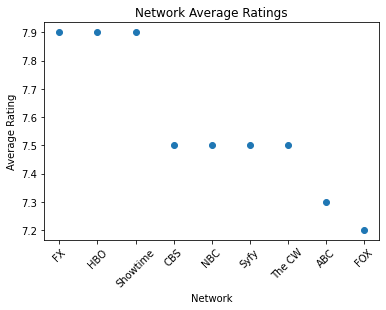

In [19]:
# TODO: Create scatter plot
plt.scatter(x = network_average_ratings.index, y = network_average_ratings.values)
#network_average_ratings.plot.scatter(x='network', y='rating')

# TODO: Add title, xlabel, ylabel, and rotate xticks
plt.title('Network Average Ratings')
plt.xlabel('Network')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
# TODO: Show plot
plt.show()

### Problem 5: Genre Breakdown for Top Networks
Next, you will print the genre breakdown for each network, and then generate a pie chart displaying which proportion of each network's shows belong to each genre. 

You have been provided with a `networks` variable, generated by grouping `df` on the `network` column. Use it to complete the steps below:
- Print the `value_counts` for the `genre` column of `networks`
- Iterate over each `network` and `group` in `networks`
- Within the loop:
  - Use the `genre` column of `group` to generate a pie chart
  - Use the `network` name as the `title` of the plot
  - Make sure the plot has no y-label
  
Be sure to call `plt.show()` within your `for` loop. Otherwise, Pandas will plot everything on a single chart!

In [20]:
# Provided Code -- Do NOT Edit!
networks = Top_Networks.groupby('network')

In [21]:
# TODO: Print `genre` value counts for each `group` in `networks`
group = networks['genre'].value_counts()
group

network   genre 
ABC       Drama     15
          Comedy     8
          Action     1
CBS       Drama     12
          Comedy     5
          Action     2
          Crime      1
FOX       Drama      8
          Comedy     5
          Action     1
FX        Drama      7
          Comedy     1
HBO       Drama      7
          Comedy     4
NBC       Drama     12
          Comedy     8
          Action     1
          Music      1
Showtime  Drama      7
          Comedy     2
          Horror     1
Syfy      Action     4
          Drama      3
          Horror     1
The CW    Drama      9
          Action     3
Name: genre, dtype: int64

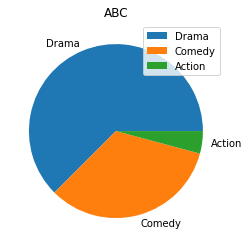

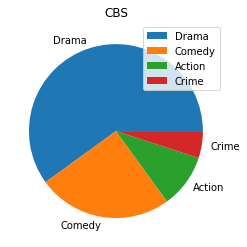

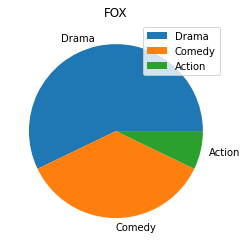

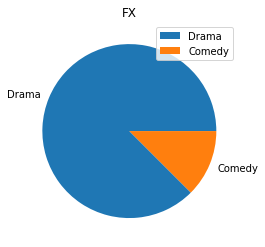

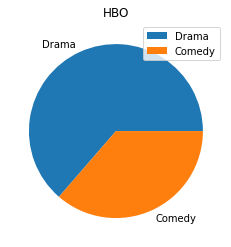

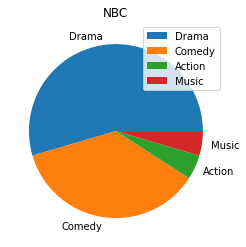

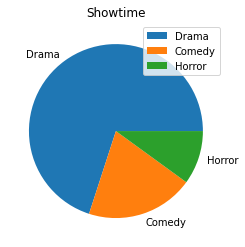

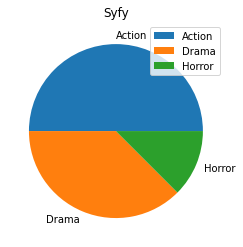

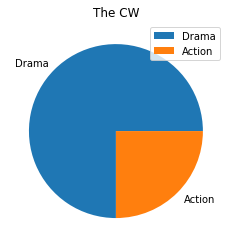

In [22]:
# TODO: Iterate over each `network` and `group` in `networks`
for network, group in networks:
  # TODO: Use the `genre` column of each `group` to generate a pie chart 
    group.genre.value_counts().plot.pie(subplots=True, legend=True)
  # TODO: Set the plot's `title` equal to the name of the `network`, and make sure there is no `ylabel`
    plt.title(network)
    plt.ylabel('')
  # TODO: `show` your plot
    plt.show()